# The Impact of COVID-19 on North American Airport and Commercial Traffic 

__Background:__ The COVID-19 pandemic has arguably become one of the most impactful events in modern human history. When the first cases of COVID-19 in the United States were reported in January 2020, much of the public (including government officials) equated the virus to a common cold or a mild flu. However, as the virus began to spread, data began to show that the rate of transmission was much higher then either the cold or the flu, and was much more lethal. On March 13, 2020, ex-President Trump declared a national emergency in response to the virus and issued a travel ban on non-Americans who had visited 26 European countries. Unfortunately, this action signaled the start of a long-term impact on the air travel and commercial. On March 19, 2020, California issued the first statewide stay-at-home order. Many other states and countries soon followed. The nationwide stay-at-home orders for non-essential workers greatly reduced the demand for consumer goods and made non-critical travel nearly impossible. Using data collected by Geotab starting in March 2020, we will explore how the pandemic impacted North American airport and commercial traffic during the eighteen months since  the start of the COVID-19 national emergency. 

__Objective:__ Explore the change in airport and commercial traffic during the COVID-19 pandemic in the United States and Canada

__Data Source__: GEOtab https://ignition.geotab.com/

__Dataset:__ Geotab COVID-19 Mobility Impact (https://data.geotab.com/covid-19-mobility-impact)


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Dataset Overview

The analysis on this project comes from two tables that are stored in the BigQuery public databases:
* big-query-public-data.covid19_geotab_mobility_impact.commercial_traffic
* big-query-public-data.covid19_geotab_mobility_impact.airport_traffic

To begin our data analysis, let's take a look at the raw data stored in the tables. As can be seen from the tables below, our data tables contain some interesting variables! 


In [1]:
%%bigquery comm 
#Commercial Traffic Data
SELECT * FROM `bigquery-public-data.covid19_geotab_mobility_impact.commercial_traffic`

Downloading: 100%|██████████| 75768/75768 [02:19<00:00, 543.23rows/s] 


In [2]:
%%bigquery air 
#Airport Traffic Data
SELECT * FROM `bigquery-public-data.covid19_geotab_mobility_impact.airport_traffic`

Downloading: 100%|██████████| 14196/14196 [00:02<00:00, 5752.23rows/s] 


In [3]:
display("Airport Traffic: ", air.head(), "Commercial Traffic: ", comm.head())

'Airport Traffic: '

,aggregation_method,date,version,airport_name,percent_of_baseline,center_point_geom,city,state_region,country_iso_code_2,country_name,airport_geom
0,Daily,2021-05-16,1.0,LaGuardia,37.0,POINT(-73.8732455278797 40.7738834966785),New York,New York,US-NY,United States of America (the),"POLYGON((-73.8876271247864 40.7672775860377, -..."
1,Daily,2020-11-08,1.0,LaGuardia,48.0,POINT(-73.8732455278797 40.7738834966785),New York,New York,US-NY,United States of America (the),"POLYGON((-73.8876271247864 40.7672775860377, -..."
2,Daily,2021-04-09,1.0,LaGuardia,55.0,POINT(-73.8732455278797 40.7738834966785),New York,New York,US-NY,United States of America (the),"POLYGON((-73.8876271247864 40.7672775860377, -..."
3,Daily,2020-12-15,1.0,LaGuardia,62.0,POINT(-73.8732455278797 40.7738834966785),New York,New York,US-NY,United States of America (the),"POLYGON((-73.8876271247864 40.7672775860377, -..."
4,Daily,2020-12-29,1.0,LaGuardia,59.0,POINT(-73.8732455278797 40.7738834966785),New York,New York,US-NY,United States of America (the),"POLYGON((-73.8876271247864 40.7672775860377, -..."


'Commercial Traffic: '

,alpha_code_3,country_iso_code_2,region,date,day_of_week,percent_of_baseline_activity,percent_of_baseline_commercial,percent_of_baseline_industrial,percent_of_baseline_warehouse,percent_of_baseline_grocery_store,percent_of_baseline_other_retail,region_geom,version
0,None,US-GA,None,2021-01-20,4,105.0,93.0,102.0,NaN,94.0,96.0,"POLYGON((-85.444455 34.198796, -85.218175 33.0...",1.1
1,None,None,CA Maritimes,2021-01-20,4,103.0,96.0,115.0,NaN,98.0,93.0,GEOMETRYCOLLECTION(MULTILINESTRING((-63.99738 ...,1.1
2,None,US-NE,None,2021-01-20,4,107.0,88.0,110.0,NaN,106.0,NaN,"POLYGON((-104.053028 43.000585, -104.053423 41...",1.1
3,None,None,US 1: New England,2021-01-20,4,98.0,92.0,102.0,NaN,99.0,98.0,GEOMETRYCOLLECTION(MULTILINESTRING((-73.300285...,1.1
4,None,MX-CHH,None,2021-01-20,4,114.0,105.0,114.0,NaN,127.0,106.0,"POLYGON((-107.42071 31.78386, -108.00317 31.78...",1.1


In [4]:
#Check for missing values
print("Missing values in the commercial table: ", comm.isna().sum(), "Missing values in the airport table: ", air.isna().sum())

Missing values in the commercial table:  alpha_code_3                         63714
country_iso_code_2                   20664
region                               67158
date                                     0
day_of_week                              0
percent_of_baseline_activity             0
percent_of_baseline_commercial       23534
percent_of_baseline_industrial       33866
percent_of_baseline_warehouse        53382
percent_of_baseline_grocery_store    17794
percent_of_baseline_other_retail     20090
region_geom                              0
version                                  0
dtype: int64 Missing values in the airport table:  aggregation_method     0
date                   0
version                0
airport_name           0
percent_of_baseline    0
center_point_geom      0
city                   0
state_region           0
country_iso_code_2     0
country_name           0
airport_geom           0
dtype: int64


In [5]:
air_shape = air.shape
comm_shape = comm.shape

print(f"The airport table has {air_shape[0]} rows and {air_shape[1]} columns.")
print(f"The commercial table has {comm_shape[0]} rows and {comm_shape[1]} columns")

The airport table has 14196 rows and 11 columns.
The commercial table has 75768 rows and 13 columns


### Data Summary

The Airport Traffic table is a collection of 14,196 observations with 11 variables, including the following:
* Aggregation Method - daily, weekly, or monthly data point
* Date
* Airport Name - name of the airport
* Percent of Baseline - activity measurement in relation to baseline period
* City
* State/Region
* Country

The Commercial Traffic table is a collection of 74,712 observations across 13 variables, including the following:
* Region - state or province
* Country - country
* Day of week - actual day of the week
* Date
* Percent of Baseline Commercial Activity - daily traffic around commercial buildings in relation to baseline period
* Percent of Baseline Industrial Activity - daily traffic around industrial buildings in relation to baseline period
* Percent of Baseline Warehouse Activity - daily traffic around warehouses in relation to baseline period
* Percent of Baseline Grocery Store Activity - daily traffic around grocery stores in relation to baseline period
* Percent of Baseline Other Retail Activity - daily traffic around other retail stores in relation to baseline period

According to the white paper for the Geotab data, the baseline percentage is a normalization of the traffic activity in a given time period in relation to the average activity between February 1st, 2020 and March 15th, 2020. Using these datasets, we can generate insights into the direct impact of the COVID-19 national emergency declaration and subsequent stay-at-home orders on  airport and commercial traffic. 

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Library Import and Data Cleanup

The two tables that we will be using to complete our analysis are the airport traffic and commercial traffic tables. For each table, we had to account for different considerations to clean the data:

* Airport Traffic
    * Contained data for Australia and Chile which. Since our focus is on North American countries, we had to filter this data out using the "country_name" column
    * The date column was used to extract the year and month as separate fields for our data cleanup.
    
* Commercial Traffic 
    * The data includes Australia, Chile, and other countries. Since our focus is on North American countries, we had to filter using the "country" field.
    * Since their are numerous values for each state and county, we calculated the averages of each baseline activity value grouped by the days.

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [7]:
comm['date'] = pd.to_datetime(comm['date'])
comm['month'] = comm['date'].dt.month
#df['country_iso_code_2'].unique()
comm['country'] = comm['country_iso_code_2'].str.split("-",expand=True)[0]
comm['destination'] = comm['country_iso_code_2'].str.split("-",expand=True)[1]

countries = ['US','CA']

comm = comm[comm['country'].isin(countries)]

averages = {"percent_of_baseline_activity":"mean",
           "percent_of_baseline_commercial":"mean",
           "percent_of_baseline_industrial":"mean",
           "percent_of_baseline_warehouse":"mean",
           "percent_of_baseline_grocery_store":"mean",
           "percent_of_baseline_other_retail":"mean"}

comm_alt = comm.groupby(["country","date"]).agg(averages).reset_index()

In [8]:
air = air[(air['country_name'] != 'Australia') & (air['country_name'] != 'Chile')]

air['year'] = pd.DatetimeIndex(air['date']).year
air['month'] = pd.DatetimeIndex(air['date']).month

In [9]:
plt.style.use("fivethirtyeight") #sets the overall style to a fivethirtyeight style
sns.set_context("notebook") #changes the scale of the chart
sns.set_style("ticks") #sets the background to white and adds tick marks along the axes

In [10]:
comm.head()

,alpha_code_3,country_iso_code_2,region,date,day_of_week,percent_of_baseline_activity,percent_of_baseline_commercial,percent_of_baseline_industrial,percent_of_baseline_warehouse,percent_of_baseline_grocery_store,percent_of_baseline_other_retail,region_geom,version,month,country,destination
0,None,US-GA,None,2021-01-20,4,105.0,93.0,102.0,NaN,94.0,96.0,"POLYGON((-85.444455 34.198796, -85.218175 33.0...",1.1,1,US,GA
2,None,US-NE,None,2021-01-20,4,107.0,88.0,110.0,NaN,106.0,NaN,"POLYGON((-104.053028 43.000585, -104.053423 41...",1.1,1,US,NE
5,None,CA-NB,None,2020-06-13,7,91.0,95.0,80.0,NaN,89.0,99.0,"MULTIPOLYGON(((-66.77128 44.79648, -66.77688 4...",1.1,6,CA,NB
6,None,US-CA,None,2021-09-02,5,121.0,107.0,108.0,110.0,115.0,110.0,"MULTIPOLYGON(((-119.477308 34.071826, -119.488...",1.1,9,US,CA
7,None,US-MO,None,2021-09-02,5,110.0,110.0,102.0,112.0,120.0,111.0,"POLYGON((-94.607701 39.119696, -94.60908 38.73...",1.1,9,US,MO


In [11]:
comm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36736 entries, 0 to 75767
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   alpha_code_3                       0 non-null      object        
 1   country_iso_code_2                 36736 non-null  object        
 2   region                             0 non-null      object        
 3   date                               36736 non-null  datetime64[ns]
 4   day_of_week                        36736 non-null  int64         
 5   percent_of_baseline_activity       36736 non-null  float64       
 6   percent_of_baseline_commercial     30996 non-null  float64       
 7   percent_of_baseline_industrial     24108 non-null  float64       
 8   percent_of_baseline_warehouse      12054 non-null  float64       
 9   percent_of_baseline_grocery_store  33292 non-null  float64       
 10  percent_of_baseline_other_retail  

--------------------------------------------------------------------------------------------------------------------------------------------

## Storyline and Perspective

To apply our project to real-life business problems, we identified organizations, job positions, and businesses that could benefit from our data analysis. 

Airport Traffic 
* Air Traffic Controller and Airlines
     * Application: 
        - Examine correlation between airport traffic and COVID-19 development
        - Prepare for incoming passengers
    
     * Questions: 
        - What top 5 airports had the lowest average baseline traffic in 2020?
        - What was the overall monthly trend for airport traffic activity between March 2020 and August 2021?
        - Which month had the most significant spikes in airport traffic?



Commercial Traffic
* Grocery stores and Retailers
    * Application: 
        - Route planning/shift optimization
        - Customer updates
        - Process optimization
        - Benchmarking


     * Questions: 
        - What commercial activity was hardest hit by the stay-at-home orders?
        - What days saw the highest surge in activity compared to baseline in the US and Canada?
        - Which region had the lowest commercial activity compared to baseline?
        - Have any commercial activities not returned to an average traffic rate above baseline?
        - What was the overall monthly trend for commercial activity between March 2020 and August 2021?






--------------------------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis

During the exploratory data analysis phase, we take a look at interesting questions that can help us derive how the stay-at-home orders impacted airport and commercial traffic activity between March 2020 and August 2021.

### What top 5 airports had the lowest average baseline traffic in 2020?

To answer this question, we grouped the airport data by airport name, city, and state and filtered for the average percent of baseline in 2020. The five airports that took the hardest traffic hit in 2020 were:
* McCarran International Airport: 
* Detroit Wayne Airport
* San Francisco International Airport
* Halifax International Airport 
* Washington Dulles International Airport


In [12]:
air1 = air

air1 = air1[air1['year'] == 2020].groupby(['airport_name','city','state_region']).mean('percent_of_baseline').reset_index()
air1.drop(['year','month'], axis=1,inplace=True)
air1.sort_values('percent_of_baseline', inplace=True)

air1.head(5)

,airport_name,city,state_region,percent_of_baseline
15,McCarran International,Paradise,Nevada,39.403448
7,Detroit Metropolitan Wayne County,Romulus,Michigan,47.393103
20,San Francisco International,South San Francisco,California,47.458621
9,Halifax International,Halifax,Nova Scotia,55.828571
24,Washington Dulles International,Floris,Virginia,55.893103


### Which months had the most significant spikes in airport traffic?

On April and May of 2020, US airport traffic had a sudden decrease and only took nearly half of activities from the average. From March 2020 to April 2020, the average baseline percentage decreased most from 71.77% to 56.24%. From May 2020 to June 2020, the average baseline percentage increased most from 59.30% to 66.72%. Meanwhile, according to the graph, neither US or Canada get back to the average percent of baseline since March 2020 to August 2021.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


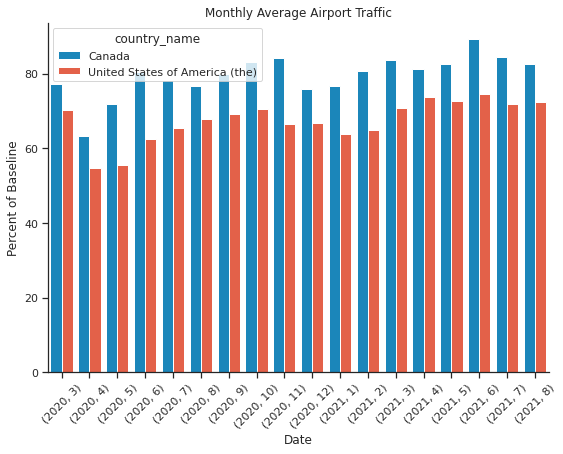

In [13]:
air2 = air

da = air2[['year','month', 'date','country_name', 'percent_of_baseline']]
da['year_month'] = da[['year','month']].apply(tuple, axis=1)
dy = da.sort_values(by=['country_name','year_month'],ascending=[True,True])

gm = dy.groupby(['country_name', 'year_month']).mean('percent_of_baseline')
gm.reset_index(inplace = True)

fig, ax = plt.subplots(figsize=(8,6))

#gm.groupby('country_name').plot(ax=ax)
spike = sns.barplot(ax = ax, x=[str(i) for i in gm['year_month']],  y=gm['percent_of_baseline'], hue=gm['country_name'])

plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Percent of Baseline')
plt.title('Monthly Average Airport Traffic')
sns.despine() 

### What was the overall monthly trend for airport traffic activity between March 2020 and August 2021?

The graphs show that air travel has fallen sharply in the second quarter of 2020 when the epidemic started to spread around the globe. Yet, airport traffic in the US and Canda has gradually climbed back up. Air traffic in both countries hit its most active month since the start of the pandemic in July 2021.

Text(0.5, 0, 'Date')

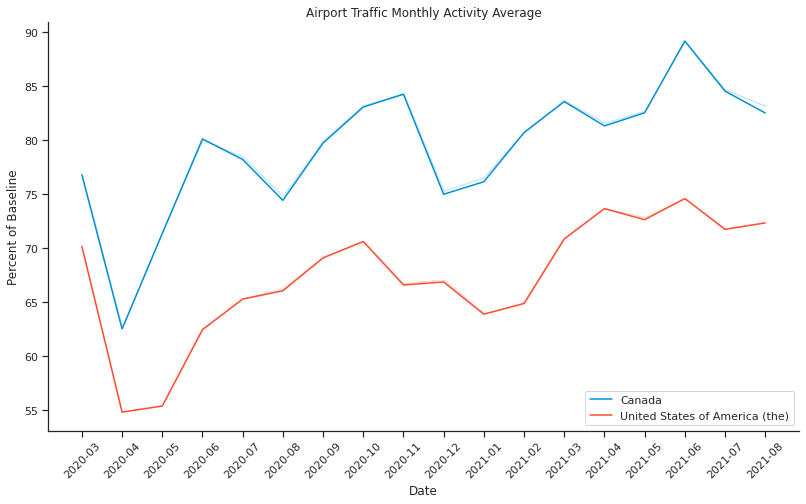

In [14]:
air3 = air

monthly=air3.groupby(['date','country_name'])['percent_of_baseline'].mean().reset_index()
monthly['month-year'] = pd.to_datetime(monthly['date']).dt.to_period('M').astype(str)

fig, ax = plt.subplots(figsize = (12, 7))
x=sns.lineplot(ax = ax, x='month-year', y='percent_of_baseline', data=monthly,hue='country_name', ci=0).set_title('Airport Traffic Monthly Activity Average')
sns.despine()
plt.legend(loc=4)
plt.ylabel('Percent of Baseline')
plt.xticks(rotation=45)
plt.xlabel('Date')

### What commercial activity was hardest hit by the stay-at-home orders?

The results of the box plots reveal that on average, Canada had a higher commercial traffic during the pandemic across all six categories of commercial traffic.  Amongst the 6 categories, warehouse and industrial traffic in Canada had the highest and lowest baseline percentages. Overall, the graphs suggest that commercial traffic in Canada was impacted more because it has the highest and lowest baseline percentages and standard deviation compared to the U.S.

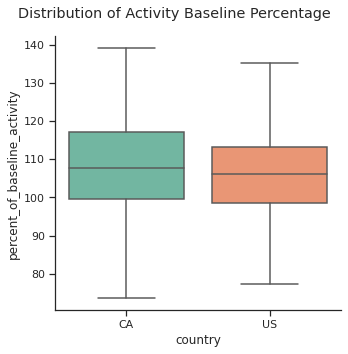

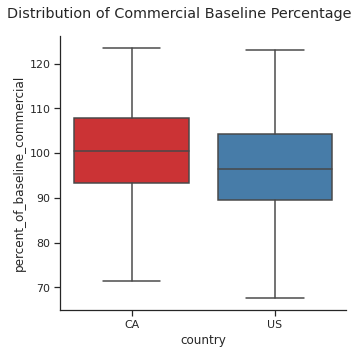

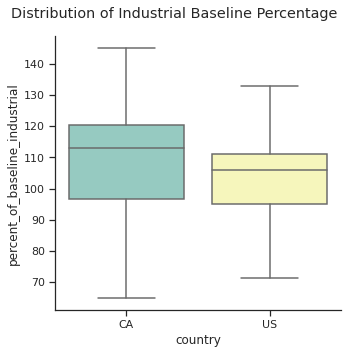

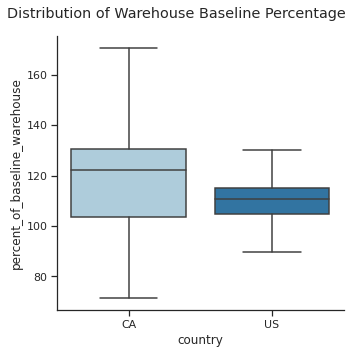

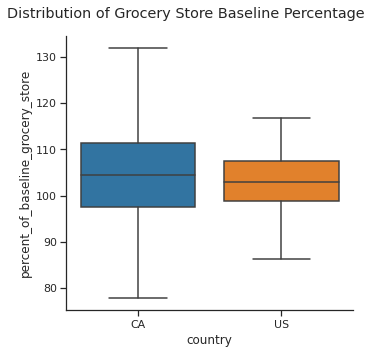

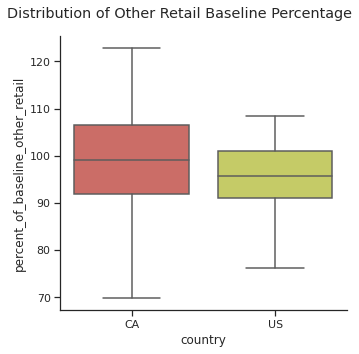

In [15]:
df1 = comm_alt


#Potentially look into plotting in 3x2 grid
p1 = sns.catplot(x = 'country', y = 'percent_of_baseline_activity', data = df1, kind = 'box', sym='', palette = sns.color_palette('Set2'))
p1.fig.suptitle('Distribution of Activity Baseline Percentage')
p1.fig.subplots_adjust(top=0.9)

p2 = sns.catplot(x = 'country', y = 'percent_of_baseline_commercial', data = df1, kind = 'box', sym='', palette = sns.color_palette('Set1'))
p2.fig.suptitle('Distribution of Commercial Baseline Percentage')
p2.fig.subplots_adjust(top=0.9)


p3 = sns.catplot(x = 'country', y = 'percent_of_baseline_industrial', data = df1, kind = 'box', sym='', palette = sns.color_palette('Set3'))
p3.fig.suptitle('Distribution of Industrial Baseline Percentage')
p3.fig.subplots_adjust(top=0.9)


p4 = sns.catplot(x = 'country', y = 'percent_of_baseline_warehouse', data = df1, kind = 'box', sym='', palette = sns.color_palette('Paired'))
p4.fig.suptitle('Distribution of Warehouse Baseline Percentage')
p4.fig.subplots_adjust(top=0.9)


p5 = sns.catplot(x = 'country', y = 'percent_of_baseline_grocery_store', data = df1, kind = 'box', sym='', palette = sns.color_palette('tab10'))
p5.fig.suptitle('Distribution of Grocery Store Baseline Percentage')
p5.fig.subplots_adjust(top=0.9)


p6 = sns.catplot(x = 'country', y = 'percent_of_baseline_other_retail', data = df1, kind = 'box', sym='', palette = sns.color_palette('hls'))
p6.fig.suptitle("Distribution of Other Retail Baseline Percentage")
p6.fig.subplots_adjust(top=0.9)



### What days saw the highest surge in activity compared to baseline in the US and Canada?

In order to answer this question, we have created data frames that have the maximum value for the baseline percentages for the US and Canada. Unsurprisingly, the highest surges in activity occurred on the same day (August 4, 2020). Surprisingly, the answer was the same for both Canada and the United States. This seems to be an anomaly in the data as there is no specific reason why there was a spike in activity on 8/4/2021. This is an area for additional investigations.

In [16]:
comm1 = comm_alt

retail_max = comm1.loc[comm1['percent_of_baseline_other_retail'] == comm1[comm1['country'] == 'US']['percent_of_baseline_other_retail'].max()]
grocery_max = comm1.loc[comm1['percent_of_baseline_grocery_store'] == comm1[comm1['country'] == 'US']['percent_of_baseline_grocery_store'].max()]
warehouse_max = comm1.loc[comm1['percent_of_baseline_warehouse'] == comm1[comm1['country'] == 'US']['percent_of_baseline_warehouse'].max()]
commercial_max = comm1.loc[comm1['percent_of_baseline_commercial'] == comm1[comm1['country'] == 'US']['percent_of_baseline_commercial'].max()]
industrial_max = comm1.loc[comm1['percent_of_baseline_industrial'] == comm1[comm1['country'] == 'US']['percent_of_baseline_industrial'].max()]
baseline_max = comm1.loc[comm1['percent_of_baseline_activity'] == comm1[comm1['country'] == 'US']['percent_of_baseline_activity'].max()]

max_activity = baseline_max.append([grocery_max, warehouse_max, commercial_max, industrial_max])

retail_max = comm1.loc[comm1['percent_of_baseline_other_retail'] == comm1[comm1['country'] != 'US']['percent_of_baseline_other_retail'].max()]
grocery_max = comm1.loc[comm1['percent_of_baseline_grocery_store'] == comm1[comm1['country'] != 'US']['percent_of_baseline_grocery_store'].max()]
warehouse_max = comm1.loc[comm1['percent_of_baseline_warehouse'] == comm1[comm1['country'] != 'US']['percent_of_baseline_warehouse'].max()]
commercial_max = comm1.loc[comm1['percent_of_baseline_commercial'] == comm1[comm1['country'] != 'US']['percent_of_baseline_commercial'].max()]
industrial_max = comm1.loc[comm1['percent_of_baseline_industrial'] == comm1[comm1['country'] != 'US']['percent_of_baseline_industrial'].max()]
baseline_max = comm1.loc[comm1['percent_of_baseline_activity'] == comm1[comm1['country'] != 'US']['percent_of_baseline_activity'].max()]

max_activity = max_activity.append([baseline_max,grocery_max, warehouse_max, commercial_max, industrial_max])
max_activity.sort_values(by=['country','date'], ascending=[True, True], inplace=True)
display(max_activity)

,country,date,percent_of_baseline_activity,percent_of_baseline_commercial,percent_of_baseline_industrial,percent_of_baseline_warehouse,percent_of_baseline_grocery_store,percent_of_baseline_other_retail
517,CA,2021-08-14,244.0,420.333333,412.250000,603.000000,453.444444,415.222222
517,CA,2021-08-14,244.0,420.333333,412.250000,603.000000,453.444444,415.222222
517,CA,2021-08-14,244.0,420.333333,412.250000,603.000000,453.444444,415.222222
517,CA,2021-08-14,244.0,420.333333,412.250000,603.000000,453.444444,415.222222
517,CA,2021-08-14,244.0,420.333333,412.250000,603.000000,453.444444,415.222222
1091,US,2021-08-14,241.5,412.777778,426.147059,435.117647,416.693878,362.928571
1091,US,2021-08-14,241.5,412.777778,426.147059,435.117647,416.693878,362.928571
1091,US,2021-08-14,241.5,412.777778,426.147059,435.117647,416.693878,362.928571
1091,US,2021-08-14,241.5,412.777778,426.147059,435.117647,416.693878,362.928571
1091,US,2021-08-14,241.5,412.777778,426.147059,435.117647,416.693878,362.928571


### How has commercial activity changed for each day of the week throughout the months?

Airport traffic wasn’t impacted much until the month of May when the  lockdown began. Commercial activity was most impacted on the weekend of the months August and September represented by the white space on the left bottom of the map. The lowest impact was in the month of December exactly on a Saturday on the day of Christmas. Months of April and May 2020 were least impacted after December the time right at the beginning of the onset of Covid in both the countries. On the weekends there is usually a surge in the traffic since the pandemic hit that has declined but we can see an evident surge in the traffic on the weekends of November and December represented by the dark blue patch on the bottom right. Monday usually is the busiest but was the worst hit due to pandemic with lowest traffic.Highest impacted on the heat map refers to least commercial activity and lowest impacted to highest activity.

Text(0.5, 1.0, 'Day of Week and Month Impact on Commercial Activity')

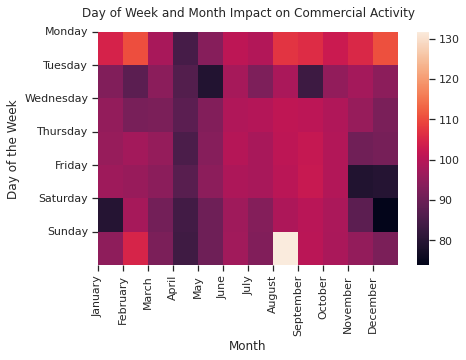

In [17]:
pivot = comm.pivot_table(
    index=["day_of_week"],
    columns=["month"],
    values="percent_of_baseline_commercial",
    aggfunc=np.mean)
sns.heatmap(pivot)
plt.yticks(range(0,7), labels=("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"), rotation = 0)
plt.ylabel("Day of the Week")
plt.xticks(range(0,12), labels=("January","February","March","April","May","June","July","August","September","October","November","December"), rotation = 90)
plt.xlabel("Month")
plt.title("Day of Week and Month Impact on Commercial Activity", pad = 15)

### Which region had the lowest commercial activity compared to baseline?

This question required us to group the commercial traffic data by country and country code, and take the minimum baseline - activity level for each of our metrics. This shows in the United State, Vermont, New Hampshire, and Puerto Rico had baseline activity near 0%! Interestingly, most of the dates for low activity fall on christmas which makes sense given the importance of the holiday.

In [18]:
comm2 = comm

comm2 = comm2.groupby(["country","country_iso_code_2","date"]).agg(averages).reset_index()

CA_min = comm2.loc[comm2['percent_of_baseline_activity'] == comm2[comm2['country'] == 'CA'].percent_of_baseline_activity.min()]
US_min = comm2.loc[comm2['percent_of_baseline_activity'] == comm2[comm2['country'] == 'US'].percent_of_baseline_activity.min()]

CA_min.fillna(0, inplace = True)
US_min.fillna(0, inplace=True)

lowest_baseline = CA_min.append(US_min)
lowest_baseline

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,country,country_iso_code_2,date,percent_of_baseline_activity,percent_of_baseline_commercial,percent_of_baseline_industrial,percent_of_baseline_warehouse,percent_of_baseline_grocery_store,percent_of_baseline_other_retail
3155,CA,CA-NS,2020-12-25,4.0,2.0,1.0,0.0,3.0,1.0
4877,CA,CA-PE,2020-12-25,4.0,0.0,0.0,0.0,0.0,0.0
34151,US,US-VT,2020-12-25,4.0,2.0,0.0,0.0,0.0,0.0
24393,US,US-NH,2020-12-25,3.0,2.0,0.0,0.0,6.0,1.0
29300,US,US-PR,2020-04-10,3.0,0.0,0.0,0.0,0.0,0.0


### Have any commercial activities not returned to an average traffic rate above baseline?

To answer this question, we grouped the commercial data by country code and check the mean of percent baseline activity for our metrics. According to the Geotab data, the overall commercial activity has not yet returned to an average above baseline. The main driver holding average commercial traffic down is the retail sector. The US is still averaging 93.5% activity, which lags behind Canada, which is at 96% of baseline activity.

In [19]:
comm3 = comm_alt.groupby(["country"]).agg(averages)
display(comm3)

,percent_of_baseline_activity,percent_of_baseline_commercial,percent_of_baseline_industrial,percent_of_baseline_warehouse,percent_of_baseline_grocery_store,percent_of_baseline_other_retail
country,,,,,,
CA,106.167393,98.356949,107.286803,122.257404,103.678475,96.596593
US,103.824980,94.961905,102.545757,109.884095,101.937816,93.578853


### What was the overall monthly trend for commercial activity between March 2020 and August 2021?

Overall, commercial traffic activity took a nosedive in March and April of 2020, but since that time has generally been on a positive trend. Interestingly, Canada and the United States tracked very closely in terms of their activity patterns. Notably, US activity overtook Canadian activity from December 2020 through April 2021. 

Text(0.5, 0, 'Date')

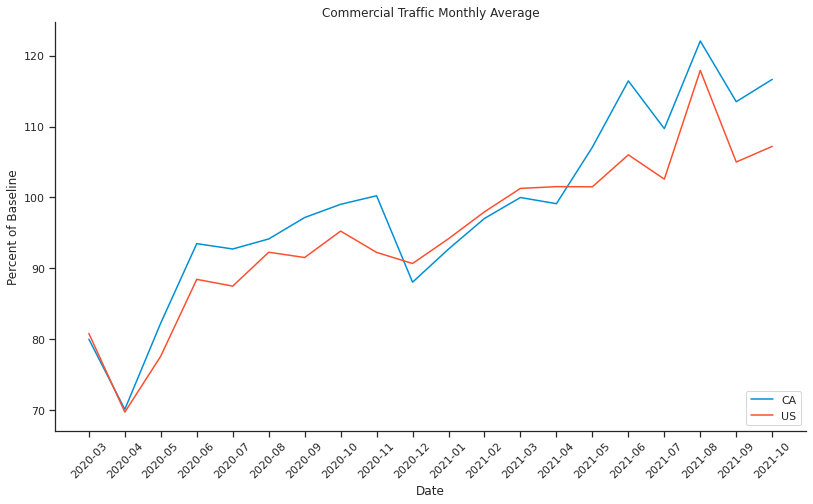

In [20]:
comm4 = comm_alt

comm4['date'] = pd.to_datetime(comm4['date'], format='%Y-%m-%d')
comm4['month'] = pd.to_datetime(comm4['date']).dt.to_period('M').astype(str)

monthly=comm4.groupby(['month','country'])['percent_of_baseline_commercial'].mean().reset_index()

fig, ax = plt.subplots(figsize = (12, 7))
x=sns.lineplot(ax = ax, x='month', y='percent_of_baseline_commercial', data=monthly,hue='country').set_title('Commercial Traffic Monthly Average')
sns.despine()
plt.legend(loc=4)
plt.ylabel('Percent of Baseline')
plt.xticks(rotation=45)
plt.xlabel('Date')

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Conclusion

As we previously established, the COVID-19 pandemic caused a major drop in non-essential activities after the nationwide emergency and stay-at-home orders went into effect in March 2020. Most travel stopped within the United States, and nearly all international travel was halted. In addition, the stay-at-home order forced families to not go out and drastically reduced the commercial traffic activity. As we have seen from our analysis the airport and commercial traffic activity dramatically dropped off in March and April of 2020. This is logical given the uncertain nature of the virus at that time, and the initial shock of citizens with the severity of the virus. As people began to learn how to live within the confines of the pandemic, the activity for airport and commercial activity began to gradually increase. In some industries, we saw that this activity has returned to pre-pandemic levels, although there is still some recovery room left for the retail sector.

We also noticed that Canada and the United States seemed to track pretty closely with both their commercial and airport traffic activity levels, which was mildly surprising. There are some periods where Canada seems to lead the way in trending. Notably, Canada is also more active than the United States for all categories (airport and commercial traffic activity). There were absolutely more specific regions that were hit harder by the pandemic than others (such as McCarran International Airport, the gateway to famed Las Vegas). Ultimately, the nationwide emergency and stay-at-home order had a tremendous impact on the economy as a whole, but the resilience of the economy was apparent as an eventual return to baseline was achieved for nearly every metric.